In [3]:
# Modules
#------------------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pandas as pd

# from scipy.integrate import solve_ivp
# from scipy.special import gamma, airy

In [60]:
dt = 3                           # time step, delta t
tmax = 25                             # max time, s
t = np.linspace(0, tmax, num=int(tmax/dt)) # time vector


columns = ['A', 'B', 'C', 'D', 'E']
exp_data = pd.DataFrame(columns=columns)


def rates(c, t):
    """
    w = wood-oil as conc[0]
    nv = non-volatiles as conc[1]
    v = volatiles as conc[2]
    """
    K1 = 0.8
    K2 = 0.1
    K3 = 0.01
    K4 = 0.01
    r0 = -K1 * c[0]
    r1 = K1 * c[0] - K2 * c[1] - K3 * c[1]
    r2 = K2 * c[1] - K4 * c[2]
    r3 = K3 * c[1]
    r4 = K4 * c[2]
    return [r0, r1, r2, r3, r4]

datasets = []

for i in range(10):
    ini_A = np.random.uniform(0.5, 1)
    ini_B = np.random.uniform(0, 0.5)
    ini_C = np.random.uniform(0, 0.5)
    ini_D = np.random.uniform(0, 0.1)
    ini_E = np.random.uniform(0, 0.1)
    
#     ini_A = 1
#     ini_B = 0
#     ini_C = 0
#     ini_D = 0
#     ini_E = 0
    
    cc = odeint(rates, [ini_A, ini_B, ini_C, ini_D, ini_E], t)

    exp_data = pd.DataFrame()
    exp_data['Time(s)'] = t
    for col in columns:
        exp_data[col] = pd.DataFrame(cc, columns=columns)[col]

    datasets.append(exp_data)
    
datasets

[     Time(s)             A         B         C         D         E
 0   0.000000  9.904654e-01  0.203542  0.081295  0.015455  0.039325
 1   3.571429  5.688501e-02  0.846753  0.338298  0.041852  0.046293
 2   7.142857  3.267056e-03  0.612403  0.583347  0.068031  0.063033
 3  10.714286  1.876348e-04  0.415789  0.741013  0.086185  0.086907
 4  14.285714  1.077683e-05  0.280844  0.835545  0.098468  0.115213
 5  17.857143  6.197945e-07  0.189612  0.887619  0.106763  0.146086
 6  21.428571  3.522916e-08  0.128013  0.911425  0.112363  0.178280
 7  25.000000  1.926103e-09  0.086425  0.916546  0.116144  0.210967,
      Time(s)             A         B         C         D         E
 0   0.000000  5.449887e-01  0.116275  0.149892  0.085779  0.013944
 1   3.571429  3.130012e-02  0.468802  0.288855  0.100430  0.021491
 2   7.142857  1.797648e-03  0.338916  0.420923  0.114919  0.034321
 3  10.714286  1.032431e-04  0.230098  0.504735  0.124966  0.050975
 4  14.285714  5.929563e-06  0.155419  0.553728

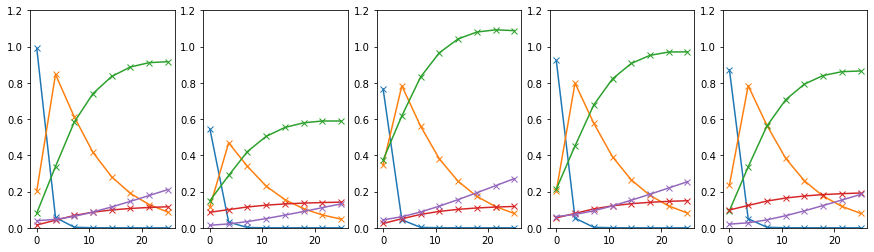

In [72]:
def example_plot(ax, plot_number, fontsize=12, hide_labels=False):
    for col in columns:
        ax.plot(datasets[plot_number]['Time(s)'], datasets[plot_number][col], label=col, marker='x')
        
    ax.set_ylim([0, 1.2])

number_of_plots = len(datasets) if len(datasets) < 5 else 5

fig, axs = plt.subplots(1, number_of_plots, figsize=(15,4), constrained_layout=False)
for i in range(len(axs)):
    example_plot(axs[i], plot_number=i)

## To regress the above data

In [74]:
import numpy, scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

t = datasets[0]['Time(s)']
yData = datasets[0].drop(['Time(s)'], axis=1).transpose().stack().reset_index(drop=True)

initials = [1, 0, 0, 0, 0]

def func(t, K1, K2, K3, K4):
    
#     result = []
    
    def rates(c, t):
#         K1 = K[0]
#         K2 = K[1]
#         K3 = K[2]
#         K4 = K[3]
        r0 = -K1 * c[0]
        r1 = K1 * c[0] - K2 * c[1] - K3 * c[1]
        r2 = K2 * c[1] - K4 * c[2]
        r3 = K3 * c[1]
        r4 = K4 * c[2]
        return [r0, r1, r2, r3, r4]
    
    cc = odeint(rates, initials, t)
    
    return pd.DataFrame(cc).transpose().stack().reset_index(drop=True)


# function for genetic algorithm to minimize (sum of squared error)
def sumOfSquaredError(parameterTuple):
    warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
    val = func(t, *parameterTuple)
    return numpy.sum(numpy.sum((yData - val) ** 2.0))


def generate_Initial_Parameters():
    # min and max used for bounds
    bound_K1 = [0.5, 1]
    bound_K2 = [0, 0.2]
    bound_K3 = [0, 0.1]
    bound_K4 = [0, 0.1]
#     bound_ini_A = [0.5, 1]
#     bound_ini_B = [0, 0.5]
#     bound_ini_C = [0, 0.5]
#     bound_ini_D = [0, 0.1]
#     bound_ini_E = [0, 0.1]
    
#     Bounds_K = []
#     Bounds_K.append(bound_K1) # search bounds for K1
#     Bounds_K.append(bound_K2) # search bounds for K2
#     Bounds_K.append(bound_K3) # search bounds for K3
#     Bounds_K.append(bound_K4) # search bounds for K4
#     Bounds_initials = []
#     Bounds_initials.append(bound_ini_A) # search bounds for initial concentration of A
#     Bounds_initials.append(bound_ini_B) # search bounds for initial concentration of B
#     Bounds_initials.append(bound_ini_C) # search bounds for initial concentration of C
#     Bounds_initials.append(bound_ini_D) # search bounds for initial concentration of D
#     Bounds_initials.append(bound_ini_E) # search bounds for initial concentration of E
    
    Bounds_K = []
    Bounds_K.append(bound_K1) # search bounds for K1
    Bounds_K.append(bound_K2) # search bounds for K2
    Bounds_K.append(bound_K3) # search bounds for K3
    Bounds_K.append(bound_K4) # search bounds for K4
#     parameter_bounds.append(bound_ini_A) # search bounds for initial concentration of A
#     parameter_bounds.append(bound_ini_B) # search bounds for initial concentration of B
#     parameter_bounds.append(bound_ini_C) # search bounds for initial concentration of C
#     parameter_bounds.append(bound_ini_D) # search bounds for initial concentration of D
#     parameter_bounds.append(bound_ini_E) # search bounds for initial concentration of E

    # "seed" the numpy random number generator for repeatable results
    result = differential_evolution(sumOfSquaredError, Bounds_K, seed=3)
#     result = differential_evolution(sumOfSquaredError, parameterBounds, seed=3)
    return result.x


# generate initial parameter values
geneticParameters = generate_Initial_Parameters()

# curve fit the test data
fittedParameters, pcov = curve_fit(func, t, yData, geneticParameters)

print('Parameters', fittedParameters)

modelPredictions = func(t, *fittedParameters) 

absError = modelPredictions - yData

SE = numpy.square(absError) # squared errors
MSE = numpy.mean(SE) # mean squared errors
RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (numpy.var(absError) / numpy.var(yData))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)


Parameters [1.17563009 0.11657004 0.00133688 0.00672875]
RMSE: 0.07974774739944146
R-squared: 0.979747826233295
